In [1]:
%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.append('/home/loringm/proliferation-and-track')
from tracking import find_match, calculate_diff_matrix, map_matches

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from skimage.segmentation import relabel_sequential

import itertools
import cv2

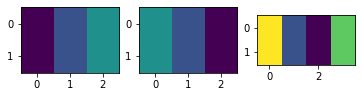

In [4]:
test1 = np.array([[0,1,2],[0,1,2]])
test2 = np.array([[2,1,0],[2,1,0]])
test3 = np.array([[4,1,0,3],[4,1,0,3]])

fig, ax  = plt.subplots(1,3)

ax[0].imshow(test1, vmin=0, vmax=4)
ax[1].imshow(test2, vmin=0, vmax=4)
ax[2].imshow(test3, vmin=0, vmax=4);

In [5]:
# def multilayered_graph(*subset_sizes):
#     extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
#     layers = [range(start, end) for start, end in extents]
#     G = nx.Graph()
#     for (i, layer) in enumerate(layers):
#         G.add_nodes_from(layer, layer=i)
#     for layer1, layer2 in nx.utils.pairwise(layers):
#         G.add_edges_from(itertools.product(layer1, layer2))
#     return G
# def calculate_diff_matrix(img1, img2, init_val=50):
    
#     for image in [img1, img2]:
#         try:
#             assert(image.min()==0)
#         except AssertionError:
#             print('image must contain background class')
        
#     img1 = relabel_sequential(img1)[0]
#     img2 = relabel_sequential(img2)[0]
    
#     unique_img1 = np.unique(img1)[1:]
#     unique_img2 = np.unique(img2)[1:]
    
#     diff_matrix = np.ones([len(unique_img1), len(unique_img2)]) * init_val
    
#     for y in unique_img2:
#         for x in unique_img1:
#             diff = ((np.array(np.where(img1==x)) - np.array(np.where(img2==y)))**2).sum()
#             diff_matrix[x,y] = diff
#     return diff_matrix

In [6]:
# def calculate_diff_matrix(img1, img2, init_val=50):
#     for image in [img1, img2]:
#         try:
#             assert (image.min() == 0)
#         except AssertionError:
#             print('image must contain background class')

#     img1 = np.int32(img1)
#     img2 = np.int32(img2)

#     img1 = relabel_sequential(img1)[0]
#     img2 = relabel_sequential(img2)[0]

#     unique_img1 = np.unique(img1)
#     unique_img2 = np.unique(img2)

#     diff_matrix = np.ones([len(unique_img1), len(unique_img2)]) * init_val

#     for y in unique_img2:
#         for x in unique_img1:
#             # diff = ((np.array(np.where(img1 == x)) - np.array(np.where(img2 == y))) ** 2).sum() # previous working solution, doesnt handle arbirtrary array sizes
#             diff = ((np.mean(np.where(img1 == x), axis=1) - np.mean(np.where(img2 == y), axis=1)) ** 2).sum()

#             diff_matrix[x, y] = diff
            
#     # this is a bit janky but it handles shifting the background 
    
#     ## actually this doesnt fix it
#     ## this works for N x N+1 but not N+1 x N
#     relatively_big_number = diff_matrix.max()**2
#     diff_matrix[0,:] = relatively_big_number
#     diff_matrix[:,0] = relatively_big_number

#     return diff_matrix

In [7]:
# def find_match(input_image_1, input_image_2, plot=False):
#     weight_mtx = calculate_diff_matrix(input_image_1, input_image_2)
#     raw_weights = weight_mtx.ravel()
    
#     lays = [range(start, end) for start, end in nx.utils.pairwise([weight_mtx.shape])]

#     G = nx.Graph()
#     for (i, layer) in enumerate(lays):
#         G.add_nodes_from(lays, layer=i)
#     for layer1, layer2 in nx.utils.pairwise(lays):
#         G.add_edges_from(itertools.product(layer1, layer2))

#     G = multilayered_graph(weight_mtx.shape[0],weight_mtx.shape[1])

#     edges = list(G.edges)
#     weights = {edges[j] : raw_weights[j] for j in range(len(edges))}

#     pos = nx.multipartite_layout(G, subset_key="layer")

#     nx.set_edge_attributes(G, values = weights, name = 'weight')

#     labels = nx.get_edge_attributes(G,'weight')
#     if plot:
#         nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, horizontalalignment='left', verticalalignment='top')
#         nx.draw(G, pos,with_labels=True)
#     return nx.algorithms.bipartite.matching.minimum_weight_full_matching(G)

In [8]:
test1

array([[0, 1, 2],
       [0, 1, 2]])

In [9]:
np.unique(test1)

array([0, 1, 2])

In [10]:
find_match(test1,test2)

({0: 3, 1: 5, 2: 4, 3: 0, 5: 1, 4: 2}, 3)

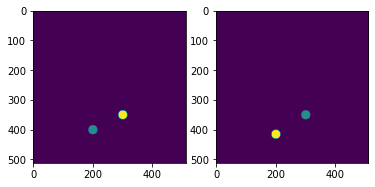

In [11]:
t1 = np.zeros([512,512])
t2 = np.zeros([512,512])

cv2.circle(t1, (200,400), 15, color=1, thickness=-1)
cv2.circle(t1, (300,350), 15, color=2, thickness=-1)

cv2.circle(t2, (200,415), 15, color=2, thickness=-1)
cv2.circle(t2, (300,350), 15, color=1, thickness=-1)

fig, ax  = plt.subplots(1,2)

ax[0].imshow(t1)
ax[1].imshow(t2);

In [12]:
calculate_diff_matrix(t1,t2)

array([[8.25503001e+08, 8.25503001e+08, 8.25503001e+08],
       [8.25503001e+08, 1.25000000e+04, 2.25000000e+02],
       [8.25503001e+08, 0.00000000e+00, 1.42250000e+04]])

In [13]:
find_match(t2,t1)

({0: 3, 1: 5, 2: 4, 3: 0, 5: 1, 4: 2}, 3)

({0: 3, 1: 5, 2: 4, 3: 0, 5: 1, 4: 2}, 3)

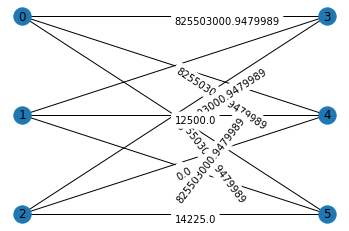

In [14]:
find_match(t1,t2, plot=True)

In [15]:
# def map_matches(mapped_array, match_dictionary):
#     ### adapted from https://stackoverflow.com/questions/16992713/translate-every-element-in-numpy-array-according-to-key ###
#     u,inv = np.unique(mapped_array,return_inverse = True)
#     return np.array([match_dictionary[x]-len(match_dictionary)//2 for x in u])[inv].reshape(mapped_array.shape)

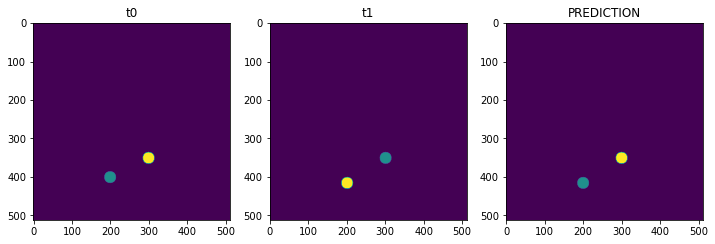

In [16]:
fig, ax  = plt.subplots(1,3, figsize=(12,8))

ax[0].imshow(t1)
ax[0].set_title('t0')
ax[1].imshow(t2)
ax[1].set_title('t1')


match_dic, layer_1_depth = find_match(t1,t2)
pred_img = map_matches(t2, match_dic, layer_1_depth)
ax[2].imshow(pred_img)
ax[2].set_title('PREDICTION');

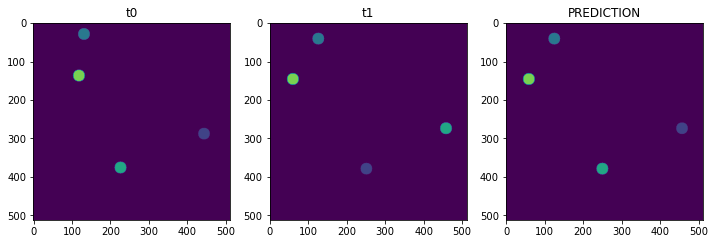

In [22]:
new_test1 = np.zeros([512,512])
new_test2 = np.zeros([512,512])

n = 0
m = 4
n_circles = 5
for i in range(n_circles):
    x,y = np.random.randint(0,512, 2)
    cv2.circle(new_test1, (x,y), 15, color=n, thickness=-1)
    
    _x,_y = np.random.randint(-25,25, 2)
    cv2.circle(new_test2, (x+_x,y+_y), 15, color=m, thickness=-1)
    n += 1
    m -= 1


fig, ax  = plt.subplots(1,3, figsize=(12,8))

ax[0].imshow(new_test1, vmin=0, vmax=5)
ax[0].set_title('t0')
ax[1].imshow(new_test2, vmin=0, vmax=5)
ax[1].set_title('t1')


match_dic, layer1shape = find_match(new_test1,new_test2)
pred_img = map_matches(new_test2, match_dic, layer1shape)
ax[2].imshow(pred_img, vmin=0, vmax=5)
ax[2].set_title('PREDICTION');

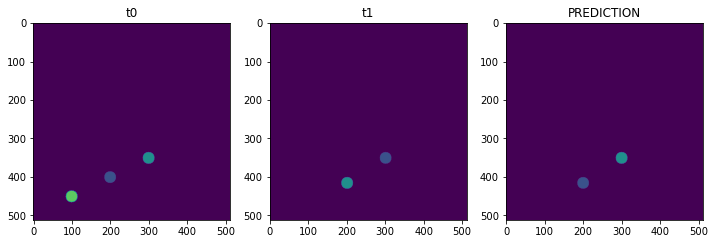

In [18]:
t1 = np.zeros([512,512])
t2 = np.zeros([512,512])

cv2.circle(t1, (200,400), 15, color=1, thickness=-1)
cv2.circle(t1, (300,350), 15, color=2, thickness=-1)
cv2.circle(t1, (100,450), 15, color=3, thickness=-1)

cv2.circle(t2, (200,415), 15, color=2, thickness=-1)
cv2.circle(t2, (300,350), 15, color=1, thickness=-1)

fig, ax  = plt.subplots(1,3, figsize=(12,8))

ax[0].imshow(t1, vmin=0, vmax=4)
ax[0].set_title('t0')
ax[1].imshow(t2, vmin=0, vmax=4)
ax[1].set_title('t1')


match_dic, l1shape = find_match(t2,t1)
pred_img = map_matches(t2, match_dic, l1shape)
ax[2].imshow(pred_img, vmin=0, vmax=4)
ax[2].set_title('PREDICTION');

In [19]:
display(calculate_diff_matrix(t2,t1))

display(find_match(t2,t1))

array([[3.8799154e+09, 3.8799154e+09, 3.8799154e+09, 3.8799154e+09],
       [3.8799154e+09, 1.2500000e+04, 0.0000000e+00, 5.0000000e+04],
       [3.8799154e+09, 2.2500000e+02, 1.4225000e+04, 1.1225000e+04]])

({0: 3, 1: 5, 2: 4, 3: 0, 5: 1, 4: 2}, 3)

In [20]:
display(calculate_diff_matrix(t1,t2))

display(find_match(t1,t2))

array([[3.8799154e+09, 3.8799154e+09, 3.8799154e+09],
       [3.8799154e+09, 1.2500000e+04, 2.2500000e+02],
       [3.8799154e+09, 0.0000000e+00, 1.4225000e+04],
       [3.8799154e+09, 5.0000000e+04, 1.1225000e+04]])

({0: 4, 1: 6, 2: 5, 4: 0, 6: 1, 5: 2}, 4)

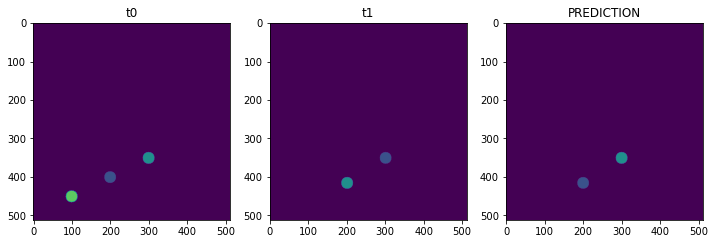

In [21]:
t1 = np.zeros([512,512])
t2 = np.zeros([512,512])

cv2.circle(t1, (200,400), 15, color=1, thickness=-1)
cv2.circle(t1, (300,350), 15, color=2, thickness=-1)
cv2.circle(t1, (100,450), 15, color=3, thickness=-1)

cv2.circle(t2, (200,415), 15, color=2, thickness=-1)
cv2.circle(t2, (300,350), 15, color=1, thickness=-1)

fig, ax  = plt.subplots(1,3, figsize=(12,8))

ax[0].imshow(t1, vmin=0, vmax=4)
ax[0].set_title('t0')
ax[1].imshow(t2, vmin=0, vmax=4)
ax[1].set_title('t1')


match_dic, l1_shape = find_match(t1,t2)
pred_img = map_matches(t2, match_dic, l1_shape)
ax[2].imshow(pred_img, vmin=0, vmax=4)
ax[2].set_title('PREDICTION');